# Exploratory Data Analysis

## Importing packages

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.ticker as mtick

In [3]:
client_df = pd.read_csv(r"C:\Users\shiva\Downloads\forage\client_data.csv")
client_df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0


In [4]:
price_df = pd.read_csv(r"C:\Users\shiva\Downloads\forage\price_data.csv")
price_df.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [5]:
client_df.shape

(14606, 26)

In [6]:
price_df.shape

(193002, 8)

In [7]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [8]:
# Converting date columns in client_df into date format

client_df['date_activ'] = pd.to_datetime(client_df['date_activ'])
client_df['date_end'] = pd.to_datetime(client_df['date_end'])
client_df['date_modif_prod'] = pd.to_datetime(client_df['date_modif_prod'])
client_df['date_renewal'] = pd.to_datetime(client_df['date_renewal'])

In [9]:
# Converting date columns in price_df into date format

price_df['price_date'] = pd.to_datetime(price_df['price_date'])

## Statistics

Now let's look at some statistics about the datasets. We can do this by using the describe() method.

In [10]:
client_df.describe(include = "number")

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.097152
std,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.296175
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000


In [11]:
price_df.describe(include = "number")

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
std,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


In [12]:
# check for missing values in client data
client_df.isna().sum()

id                                0
channel_sales                     0
cons_12m                          0
cons_gas_12m                      0
cons_last_month                   0
date_activ                        0
date_end                          0
date_modif_prod                   0
date_renewal                      0
forecast_cons_12m                 0
forecast_cons_year                0
forecast_discount_energy          0
forecast_meter_rent_12m           0
forecast_price_energy_off_peak    0
forecast_price_energy_peak        0
forecast_price_pow_off_peak       0
has_gas                           0
imp_cons                          0
margin_gross_pow_ele              0
margin_net_pow_ele                0
nb_prod_act                       0
net_margin                        0
num_years_antig                   0
origin_up                         0
pow_max                           0
churn                             0
dtype: int64

In [13]:
# check for missing values in price data
price_df.isna().sum()

id                    0
price_date            0
price_off_peak_var    0
price_peak_var        0
price_mid_peak_var    0
price_off_peak_fix    0
price_peak_fix        0
price_mid_peak_fix    0
dtype: int64

In [14]:
merged_df = client_df.merge(price_df, on = "id", how = "left")
merged_df

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,origin_up,pow_max,churn,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2015-01-01,0.125976,0.103395,0.071536,40.565969,24.339581,16.226389
1,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2015-02-01,0.125976,0.103395,0.071536,40.565969,24.339581,16.226389
2,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2015-03-01,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383
3,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2015-04-01,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383
4,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2015-05-01,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175144,563dde550fd624d7352f3de77c0cdfcd,MISSING,8730,0,0,2009-12-18,2016-12-17,2009-12-18,2015-12-21,762.41,...,ldkssxwpmemidmecebumciepifcamkci,10.392,0,2015-08-01,0.165962,0.086905,0.000000,44.266930,0.000000,0.000000
175145,563dde550fd624d7352f3de77c0cdfcd,MISSING,8730,0,0,2009-12-18,2016-12-17,2009-12-18,2015-12-21,762.41,...,ldkssxwpmemidmecebumciepifcamkci,10.392,0,2015-09-01,0.165962,0.086905,0.000000,44.266930,0.000000,0.000000
175146,563dde550fd624d7352f3de77c0cdfcd,MISSING,8730,0,0,2009-12-18,2016-12-17,2009-12-18,2015-12-21,762.41,...,ldkssxwpmemidmecebumciepifcamkci,10.392,0,2015-10-01,0.165962,0.086905,0.000000,44.266930,0.000000,0.000000
175147,563dde550fd624d7352f3de77c0cdfcd,MISSING,8730,0,0,2009-12-18,2016-12-17,2009-12-18,2015-12-21,762.41,...,ldkssxwpmemidmecebumciepifcamkci,10.392,0,2015-11-01,0.165962,0.086905,0.000000,44.266930,0.000000,0.000000


In [15]:
client_df['churn'].value_counts(normalize = True)*100

churn
0    90.284814
1     9.715186
Name: proportion, dtype: float64

## Churn vs Has gas contract

In [16]:
# number of unique client company
client_df['id'].nunique()

14606

In [17]:
#how many clients are gas clients and how many are not
client_df['has_gas'].value_counts()

has_gas
f    11955
t     2651
Name: count, dtype: int64

1. 2651 are both electricity and gas clients
2. 11955 are only electricity clients

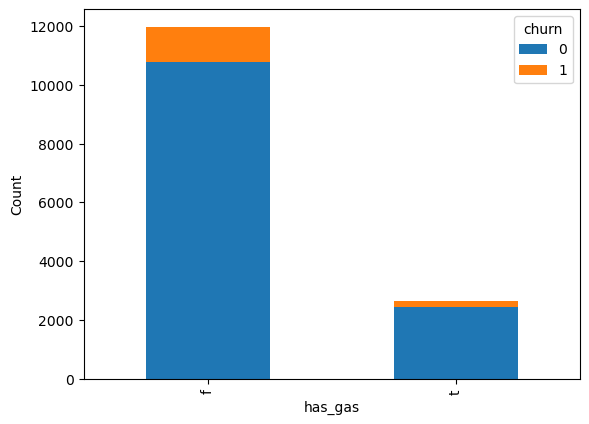

In [18]:
# plotting stacked bar chart
counts = client_df.groupby(['has_gas','churn']).size().unstack(fill_value=0)
counts.plot(kind = "bar", stacked = True)
plt.ylabel('Count')
plt.show()

In [19]:
# Clients who only have electricity contract 
client_df[client_df['has_gas'] == 'f']['churn'].value_counts(normalize = True)*100

churn
0    89.945629
1    10.054371
Name: proportion, dtype: float64

Clients who only have electricity contract have 10% churned and 90% not churned

In [20]:
# Clients who have both electricity and gas contract 
client_df[client_df['has_gas'] == 't']['churn'].value_counts(normalize = True)*100

churn
0    91.81441
1     8.18559
Name: proportion, dtype: float64

Clients who have both electricity and gas contracts have only 8% churned and 92% not churned. 

We shall test whether a relationship exists between type of contract through Hypothesis Testing

Does having gas connection reduces the churn?

### Hypothesis Testing- relationship between churn and has_gas

Chi- Squared test of Independence- Is churn status independent of having connection? (categorical vs categorical)
H0: Churn status and having gas &electricity connection are independent (no relationship)
Ha: There is a relationship between churn and having gas and electricity. 

In [21]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(client_df['churn'], client_df['has_gas'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print("p- value", p)
print("contingency table: ")
print(contingency_table)

p- value 0.0036957589641509795
contingency table: 
has_gas      f     t
churn               
0        10753  2434
1         1202   217


since p-value turns out to be 0.003 < 0.05. Hence with 95% confidence, we reject the null hypothesis. That is, there is a relationship between churn and gas connection. To find out the relationship between smoking and sex, we will find the % in the contingency table.

In [22]:
pd.crosstab(client_df['has_gas'], client_df['churn'], normalize='index') * 100

churn,0,1
has_gas,,
f,89.945629,10.054371
t,91.814410,8.185590


Hence it can be seen that, clients who have only electricity connection are churned more. While clients who have electricity and gas connection are churned less. 

### Churn vs Sales channel

In [23]:
client_df['channel_sales'].nunique()

8

In [24]:
channel = client_df[['id','channel_sales', 'churn']]
channel_df = channel.groupby(['channel_sales', 'churn'])['id'].count().unstack(level = 1).fillna(0)
channel_df['total'] = channel_df.sum(axis = 1) 
channel_pct = (channel_df.div(channel_df['total'], axis=0) * 100) # each row (through axis = 0) of channel_df is divided by (.divide) by its 'total' 
# column (.div(channel_df['total']) 
channel_pct.drop(columns = 'total', inplace = True)
channel_pct

churn,0,1
channel_sales,,
MISSING,92.402685,7.597315
epumfxlbckeskwekxbiuasklxalciiuu,100.000000,0.000000
ewpakwlliwisiwduibdlfmalxowmwpci,91.601344,8.398656
fixdbufsefwooaasfcxdxadsiekoceaa,100.000000,0.000000
foosdfpfkusacimwkcsosbicdxkicaua,87.859046,12.140954
lmkebamcaaclubfxadlmueccxoimlema,94.411286,5.588714
sddiedcslfslkckwlfkdpoeeailfpeds,100.000000,0.000000
usilxuppasemubllopkaafesmlibmsdf,89.963636,10.036364


Text(0.5, 0, 'Channel Sales')

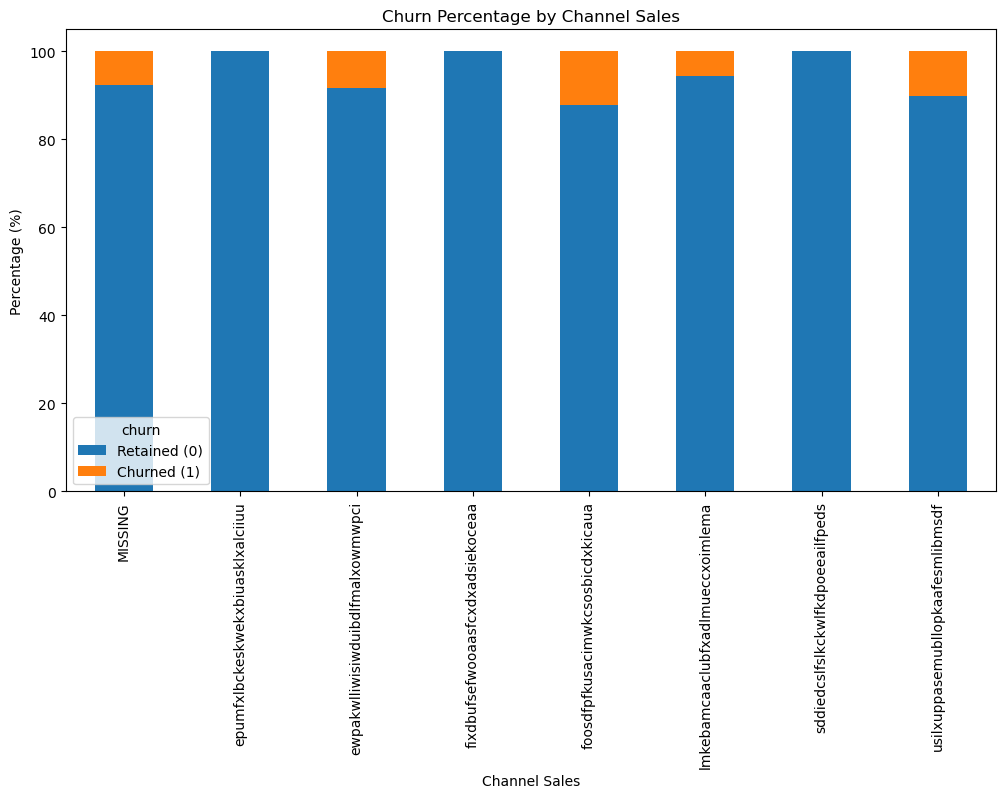

In [25]:
channel_pct.plot(kind = 'bar', stacked = True, figsize=(12,6))
plt.legend(title = 'churn', labels=["Retained (0)", "Churned (1)"])
plt.title("Churn Percentage by Channel Sales")
plt.ylabel("Percentage (%)")
plt.xlabel("Channel Sales")

Clearly Sales channel influences the churn of the companies. Here only 3 channel provide 100% retain rate. 

### Price sensitivity
 
Price sensitivity is commonly measured using the price elasticity of demand, which states that some consumers won't pay more if a lower-priced option is available. Formula of which is % change in quantity demanded / % change in price.
As a general rule, if the absolute value of the price elasticity of demand formula is greater than 1, the product or service would be considered elastic meaning that the price is very likely to influence how much people buy. 


In [27]:
# For peak season
# Calculate Price elasticity of demand
merged_df['perc_change_cons_peak'] = (merged_df['forecast_cons_12m'] - merged_df['cons_12m']) / merged_df['cons_12m']

merged_df['perc_change_price_peak'] = (merged_df['forecast_price_energy_peak'] - merged_df['price_peak_var']) / merged_df['price_peak_var']

merged_df['elasticity_peak'] = merged_df['perc_change_cons_peak'] / merged_df['perc_change_price_peak'] 


In [28]:
# whether elastic customers churn more.
merged_df['elasticity_type'] = merged_df['elasticity_peak'].apply(
    lambda x: 'elastic' if abs(x) > 1 else 'inelastic'
)

pd.crosstab(merged_df['elasticity_type'], merged_df['churn'], normalize='index') *100

churn,0,1
elasticity_type,,
elastic,89.558720,10.441280
inelastic,91.064189,8.935811


For the peak season, It is clear that elastic customers (the price is very likely to influence how much customer will buy) will churn more than non- elastic customers. Although the difference is little ( 10.4% vs 8.9%). 

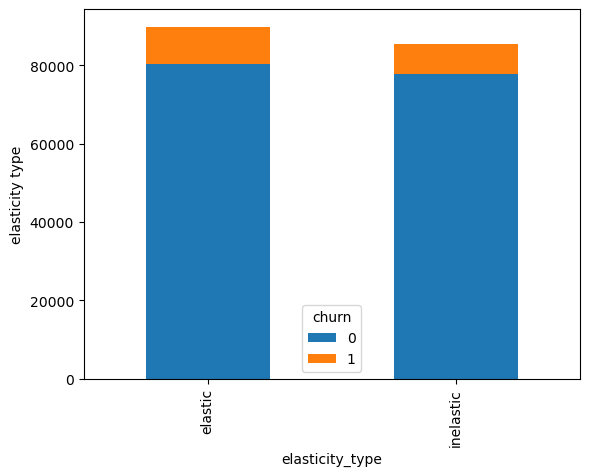

In [30]:
counts_ = merged_df.groupby(['elasticity_type','churn']).size().unstack(fill_value=0)
counts_.plot(kind = "bar", stacked = True)
plt.ylabel('elasticity type')
plt.show()

# Feature Engineering

## Difference between off-peak prices in December and preceding January